<a href="https://colab.research.google.com/github/phrenico/control-notebooks/blob/main/Pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pendulum 

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


%matplotlib inline

The ODE description:
$$
\frac{\partial^2 \theta}{\partial t ^ 2} + s \frac{\partial \theta}{\partial t } + \frac{g}{L}\sin{\theta} = 0
$$


State space equations with variables $x_1 = \theta$, $x_2 = \dot{\theta}$:

$$
\begin{align}
\dot{x}_1 &= x_2 \\
\dot{x}_2 &= - \frac{g}{L} sin(x_1) - s x_2 
\end{align}
$$

Text(0, 0.5, 'Amplitude')

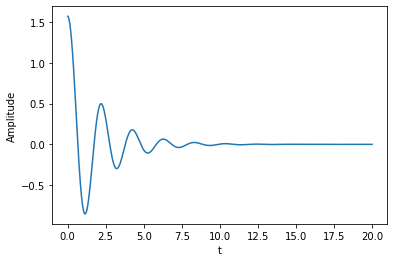

In [3]:
def f(x, t, s=1, L=1, g=9.81):
  dx1 = x[1]
  dx2 = - g / L *  np.sin(x[0]) - s * x[1]
  return [dx1, dx2]


s = 1
L= 1
g= 9.81

x0 = [np.pi/2, 0]
t = np.arange(0, 20, 0.01)

phi = odeint(f, x0, t)

plt.plot(t, phi[:, 0])
plt.xlabel('t')
plt.ylabel('Amplitude')

## Linearization of the system around the fixed points:

The fixed points are $x^*_1=(0, 0)$ and $x^*_2=(\pi, 0)$ where the former is stable and the latter is unstable.

$$
\dot{x} = J(x^*) \times (x - x^*)
$$
where J is the Jacobian of the dynamics and $x^*$ is an equilibrium point:
$$
J = \left(
\begin{matrix}
0 & 1\\
-\frac{g}{L}\cos{x_1} & -s
\end{matrix} \right)
$$

Thus at the fixed points:
$$
J(x^*_1) = \left(
\begin{matrix}
0 & 1\\
-\frac{g}{L} & -s
\end{matrix} \right)
$$ 

$$
J(x^*_2) = \left(
\begin{matrix}
0 & 1\\
\frac{g}{L} & -s
\end{matrix} \right)
$$


In [8]:
# Jacobian at the two fixed points (up and down) 
J_down = np.array([[0, 1], [-g / L, -s]])

J_up = np.array([[0, 1], [g / L, -s]])

print("Eigenvalues for the up state:", np.linalg.eig(J_up)[0])
print("Eigenvalues for the down state:", np.linalg.eig(J_down)[0])

Eigenvalues for the up state: [ 2.67175031 -3.67175031]
Eigenvalues for the down state: [-0.5+3.09192497j -0.5-3.09192497j]


Text(0, 0.5, 'Amplitude')

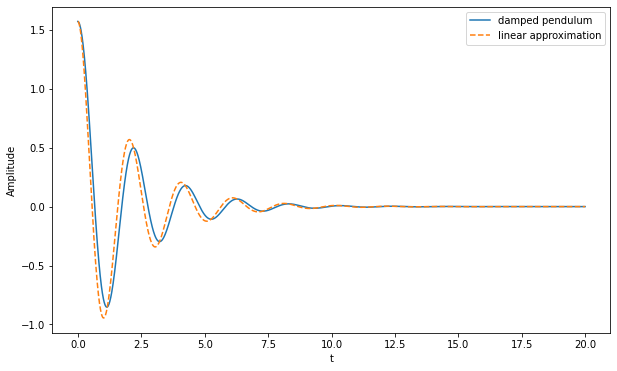

In [11]:
# linearized dynamics with Jacobian  
def lin_f(x, t, A=J_down):
  return np.dot(A, x)

x0 = [np.pi/2, 0]
t = np.arange(0, 20, 0.01)

phi = odeint(f, x0, t)
phi_approx = odeint(lin_f, x0, t)

plt.figure(figsize=(10, 6))
plt.plot(t, phi[:, 0], label='damped pendulum')
plt.plot(t, phi_approx[:, 0], '--', label='linear approximation')
plt.legend()
plt.xlabel('t')
plt.ylabel('Amplitude')

2